# Regression for diabetes

In [94]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

<module 'sklearn.datasets.data' from '/opt/conda/lib/python3.9/site-packages/sklearn/datasets/data/__init__.py'>

In [48]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [49]:
df_x = diabetes.data
df_y = diabetes.target
type(df_x)
df_x[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [50]:
df_x = np.array(df_x)
df_y = np.array(df_y)

In [51]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [52]:
# 임의의 초기 Wi,b를 생성
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [58]:
# 모델 생성
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [59]:
# 비용함수 생성1(MSE)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [60]:
# 비용함수 생성2(embedding MSE)
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [61]:
# 비용함수의 gradient 생성
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [76]:
# optimum 계산(Wi & b w/ model, loss & gradient embedded)
LEARNING_RATE = 0.1
iteration=3000

losses = []

for i in range(1, iteration+1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4958.7856
Iteration 20 : Loss 4913.9470
Iteration 30 : Loss 4870.4215
Iteration 40 : Loss 4828.1652
Iteration 50 : Loss 4787.1361
Iteration 60 : Loss 4747.2935
Iteration 70 : Loss 4708.5980
Iteration 80 : Loss 4671.0117
Iteration 90 : Loss 4634.4980
Iteration 100 : Loss 4599.0216
Iteration 110 : Loss 4564.5484
Iteration 120 : Loss 4531.0453
Iteration 130 : Loss 4498.4807
Iteration 140 : Loss 4466.8238
Iteration 150 : Loss 4436.0449
Iteration 160 : Loss 4406.1155
Iteration 170 : Loss 4377.0079
Iteration 180 : Loss 4348.6954
Iteration 190 : Loss 4321.1524
Iteration 200 : Loss 4294.3538
Iteration 210 : Loss 4268.2758
Iteration 220 : Loss 4242.8950
Iteration 230 : Loss 4218.1892
Iteration 240 : Loss 4194.1366
Iteration 250 : Loss 4170.7165
Iteration 260 : Loss 4147.9086
Iteration 270 : Loss 4125.6935
Iteration 280 : Loss 4104.0523
Iteration 290 : Loss 4082.9669
Iteration 300 : Loss 4062.4198
Iteration 310 : Loss 4042.3939
Iteration 320 : Loss 4022.8730
Iteration 330 : L

Iteration 2850 : Loss 2977.5435
Iteration 2860 : Loss 2976.8721
Iteration 2870 : Loss 2976.2069
Iteration 2880 : Loss 2975.5478
Iteration 2890 : Loss 2974.8948
Iteration 2900 : Loss 2974.2477
Iteration 2910 : Loss 2973.6066
Iteration 2920 : Loss 2972.9713
Iteration 2930 : Loss 2972.3418
Iteration 2940 : Loss 2971.7180
Iteration 2950 : Loss 2971.0999
Iteration 2960 : Loss 2970.4875
Iteration 2970 : Loss 2969.8806
Iteration 2980 : Loss 2969.2793
Iteration 2990 : Loss 2968.6834
Iteration 3000 : Loss 2968.0930


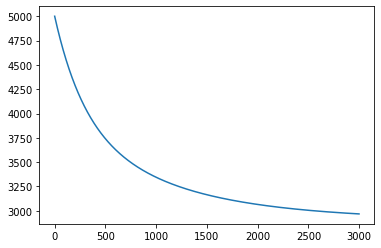

In [88]:
# x_train losses along with iteration
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [78]:
W, b

(array([  48.64903549, -157.47858061,  454.93134725,  300.12077216,
         -43.24633685,  -90.4102969 , -206.49843669,  146.74326166,
         341.55873528,  136.43148648]),
 151.52277715358835)

In [79]:
# x_test의 비용함수
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2868.267652980769

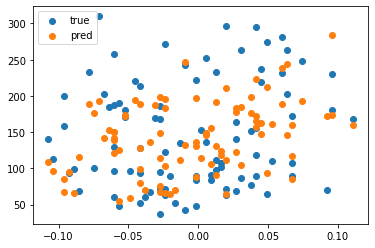

In [86]:
# x_test에 대한 시각화
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.legend(loc='best')
plt.show()

## Retrospect

* gradient에 대한 개념을 명확히 할 수 있는 기회였고, 시각화 리뷰가 필요하다.